<a href="https://colab.research.google.com/github/aadelmohd/EinNel-Internship/blob/main/driver_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun Mar 24 19:35:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [5]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 523, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'benchmark', 'export', 'predict', 'track', 'val', 'train'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'detect', 'segment', 'obb', 'classify', 'pose'}
                MODE (required) is one of {'benchmark', 'export', 'predict', 'track', 'val', 'train'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1BOLgA4RKoZ9pVpm4dBX")
project = rf.workspace("aadel").project("car-object-detection-nuo8k")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.33, to fix: `pip install ultralytics==8.0.196`


In [7]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/car-object-detection-3/data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/car-object-detection-3/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

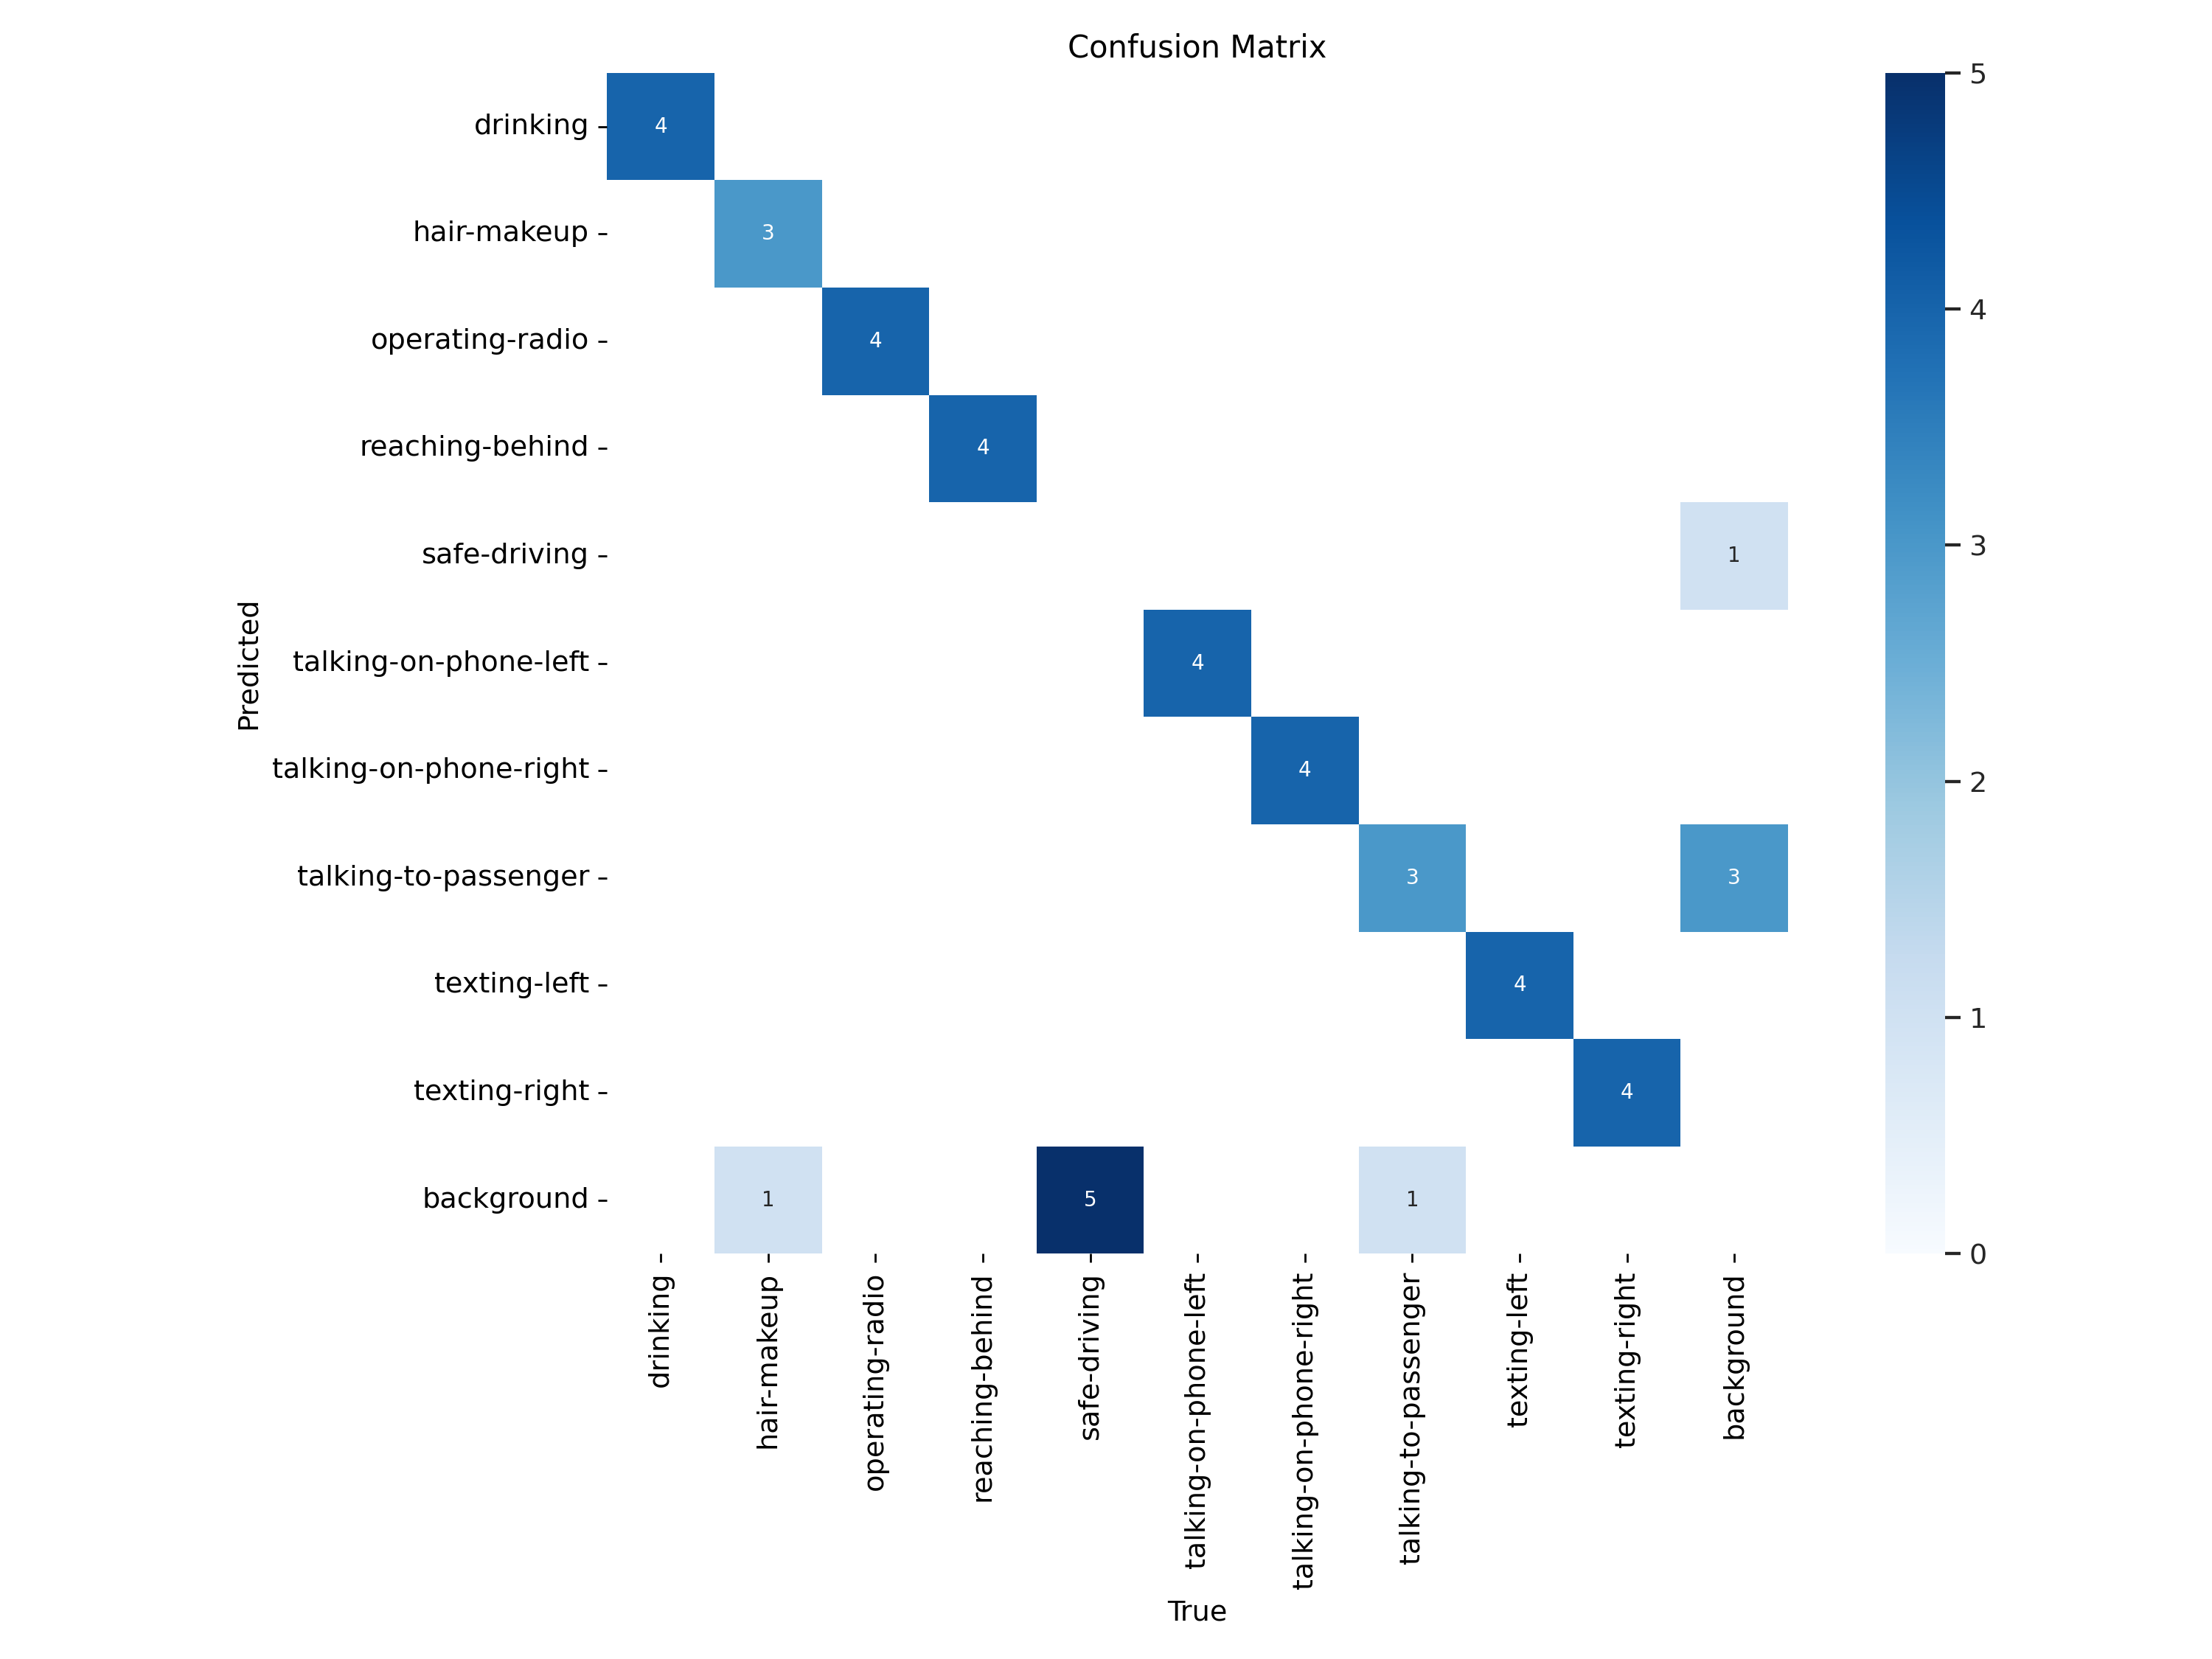

In [8]:
Image(filename=f'/content/runs/detect/train3/confusion_matrix.png', width=600)

In [9]:
!yolo task=detect mode=val model=/content/runs/detect/train3/weights/best.pt data=/content/car-object-detection-3/data.yaml

Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/car-object-detection-3/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100% 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.02it/s]
                   all         41         41      0.836      0.841       0.88      0.523
              drinking         41          4      0.923          1      0.995      0.661
           hair-makeup         41          4          1      0.684      0.888      0.315
       operating-radio         41          4       0.93          1      0.995      0.711
       reaching-behind         41          4      0.987          1      0.995      0.699
          safe-driving         41          5          0          0      0.227      0.159
 talking-on-phone-left         41        

In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.5 source=/content/car-object-detection-3/test/images

Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25845550 parameters, 0 gradients, 78.7 GFLOPs

image 1/1000 /content/car-object-detection-3/test/images/img_1000_jpg.rf.0fcbf55dfc86934b9b58ee69d160aa61.jpg: 640x640 1 talking-on-phone-right, 40.1ms
image 2/1000 /content/car-object-detection-3/test/images/img_1001_jpg.rf.b1f8af45968dc7d02b0836e36ddc0371.jpg: 640x640 1 operating-radio, 37.1ms
image 3/1000 /content/car-object-detection-3/test/images/img_1002_jpg.rf.b8dc2d92706ec05391868652fcb1e67d.jpg: 640x640 1 operating-radio, 37.0ms
image 4/1000 /content/car-object-detection-3/test/images/img_1003_jpg.rf.77d21c66dd0e5884f17dc86b0af094d2.jpg: 640x640 1 drinking, 35.6ms
image 5/1000 /content/car-object-detection-3/test/images/img_1004_jpg.rf.4b93ae1e9235a2e50010e76da8e50244.jpg: 640x640 1 hair-makeup, 34.8ms
image 6/1000 /content/car-object-detection-3/test/images/img_1006_jpg.rf.dde65fc89720044c8399b0377b9bbd6b.jpg:

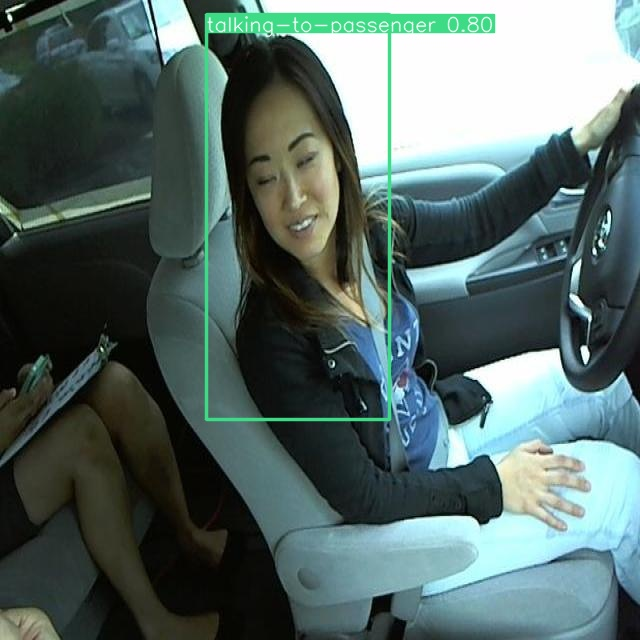

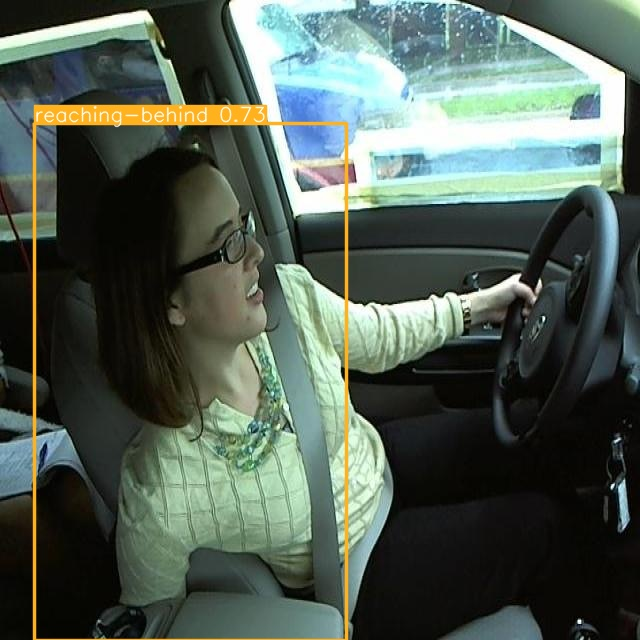

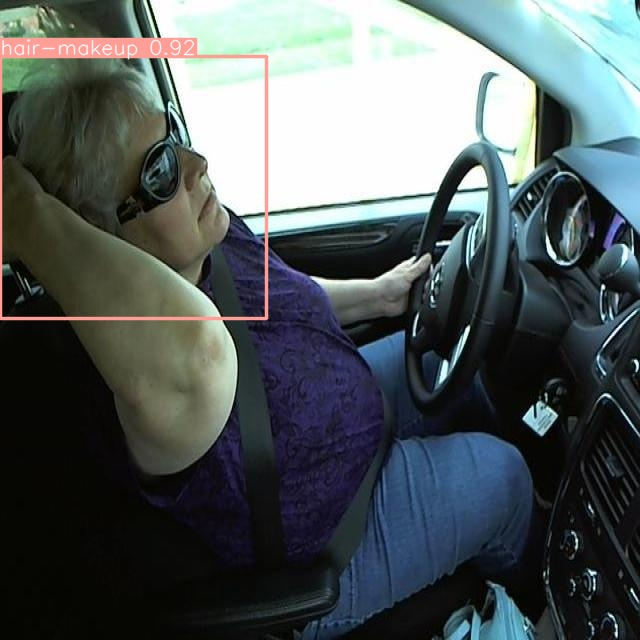

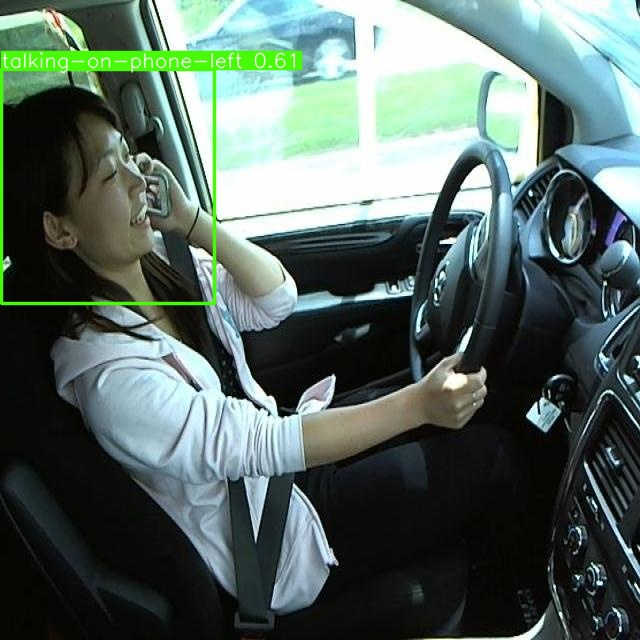

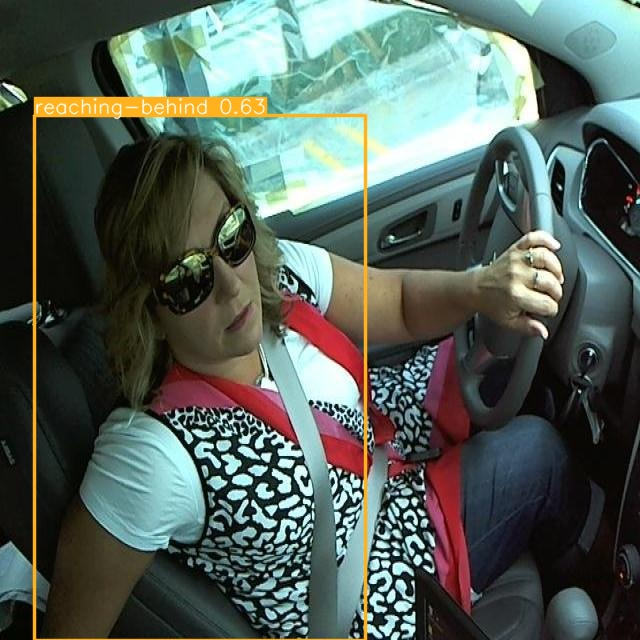

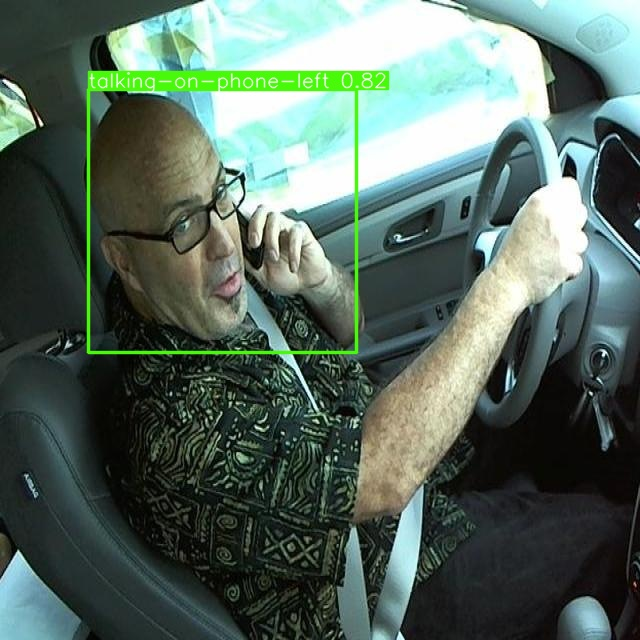

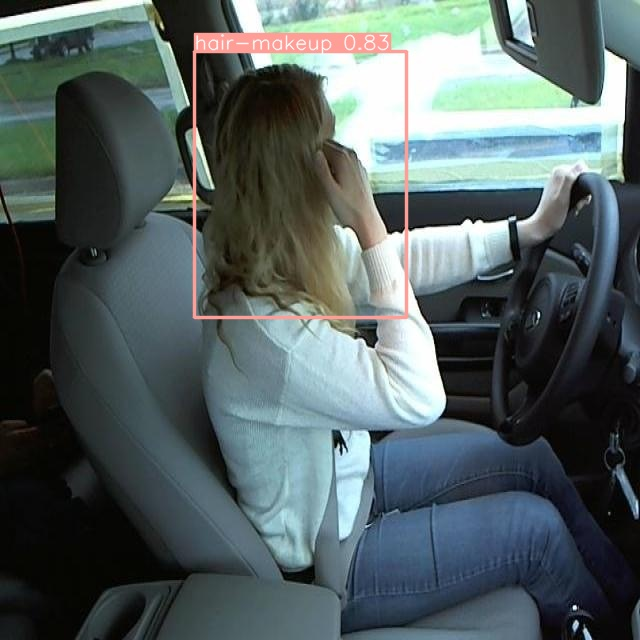

In [13]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:7]:
  display(Image(filename=image_path, height=400))
  print("\n")